### **Интерполяция параметрически заданной функции**

Импортируем нужные библиотеки

In [1]:
import numpy as np
from math import hypot
from scipy import linalg
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import matplotlib.pyplot as plt
%matplotlib inline

#### **Интерполяция параметрически заданной функции кубическим сплайном**

Создаем массив t и две параметрические функции x(t) и y(t). После выполнения кода мы получим массив значений функций x и y в заданных точках t

In [2]:
t = np.arange(0, 1.1, .15)
y = np.sin(3*np.pi*t)
x = np.cos(np.pi*t+0.2)

В unew положим массив точек, в которых нужно вернуть значение сглаженного сплайна или его производных

In [3]:
unew = np.arange(0, 1.01, 0.01)
tck, u = interpolate.splprep([x, y], s=0)
out = interpolate.splev(unew, tck)

По итогу получаем график интерполированной функции

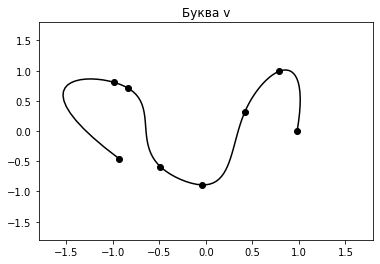

In [4]:
plt.figure()
plt.plot(x, y, 'o', out[0], out[1], color = 'black')
plt.axis([-1.8, 1.8, -1.8, 1.8])
plt.title('Буква v')
plt.show()

Теперь найдем координаты 8 точек, отмеченных на графике

In [5]:
print("Координаты по x:", x, "\nКоординаты по y:", y)

Координаты по x: [ 0.98006658  0.78305173  0.41534182 -0.04290719 -0.49180299 -0.83349215
 -0.9934909  -0.9369216 ] 
Координаты по y: [ 0.          0.98768834  0.30901699 -0.89100652 -0.58778525  0.70710678
  0.80901699 -0.4539905 ]


Теперь найдем расстояние между точками для того, чтобы интерполировать данные ($\sum_{i=1}^{i-1}d_i, x_i$) и ($\sum_{i=1}^{i-1}d_i, y_i$), где $d_i$ - расстояние между точками $p_i$ и $p_{i+1}$

In [6]:
d = []
for i in range(len(out[0]) - 1):
    d.append(hypot(out[0][i + 1] - out[0][i], out[1][i + 1] - out[1][i]))

Создаем два новых списка xd и yd для хранения суммы расстояний между точками и соответственными координатами x и y, выводим графики

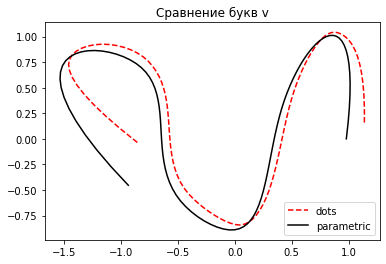

In [7]:
xd = []
yd = []
for i in range(len(out[0]) - 1):
    xd.append(d[i] + out[0][i])
    yd.append(d[i] + out[1][i])

plt.figure()
plt.plot(xd, yd, '--', color = 'red', label = 'dots')
plt.plot(out[0], out[1], color = 'black', label = 'parametric')
plt.legend(loc = 4)
plt.title('Сравнение букв v')
plt.show()

#### **Интерполяция Эрмитовым кусочно-кубический интерполянтом**

Интерполяция Эримитовым кусочно-кубическим интерполянтом осуществляется при помощи функции pchip. Для того, чтобы интерполировать параметрическую функцию при помощи pchip, нужно по отдельности вызвать эту функцию как для x, так и для y 

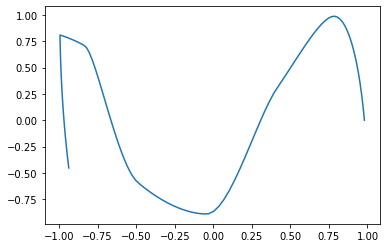

In [8]:
tt = np.linspace(np.min(t), np.max(t), 100)

pchipx = interpolate.pchip(t, x)
pchipy = interpolate.pchip(t, y)

plt.plot(pchipx(tt), pchipy(tt))

Теперь сравним все имеющиеся у нас графики функций

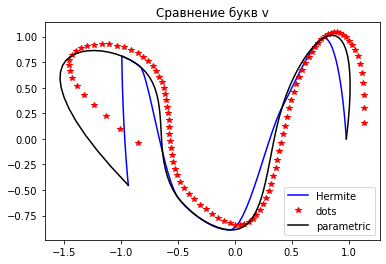

In [9]:
plt.plot(pchipx(tt), pchipy(tt), color = 'blue', label = 'Hermite')
plt.plot(xd, yd, '*', color = 'red', label = 'dots')
plt.plot(out[0], out[1], color = 'black', label = 'parametric')
plt.legend(loc = 4)
plt.title('Сравнение букв v')
plt.show()

Напоследок хочу показать, как выглядит график без интерполяции

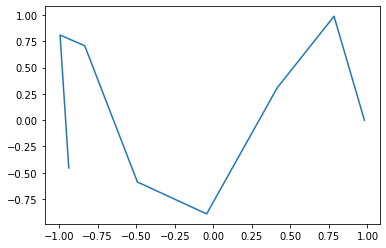

In [10]:
plt.plot(x, y)

По итогу лучше всего получилась интерполяция кубическим сплайном, интерполяция с использованием расстояний между точками вышла с некоторым смещением, а Эрмитова - во многих местах ломаная